# Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

2.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.(Regression)

b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

# 1. Classification Problem

# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd

train_dset = pd.read_csv("C:/Dataset/Dataset/training_set_loan.csv")
test_dset = pd.read_csv("C:/Dataset/Dataset/testing_set_loan.csv")

In [2]:
train_dset.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,NaN,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
#test_dset.head(3)

In [4]:
train_dset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#train_dset.info()

In [6]:
train_dset.shape

(614, 13)

In [7]:
train_dset.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Exploratory Data Analysis

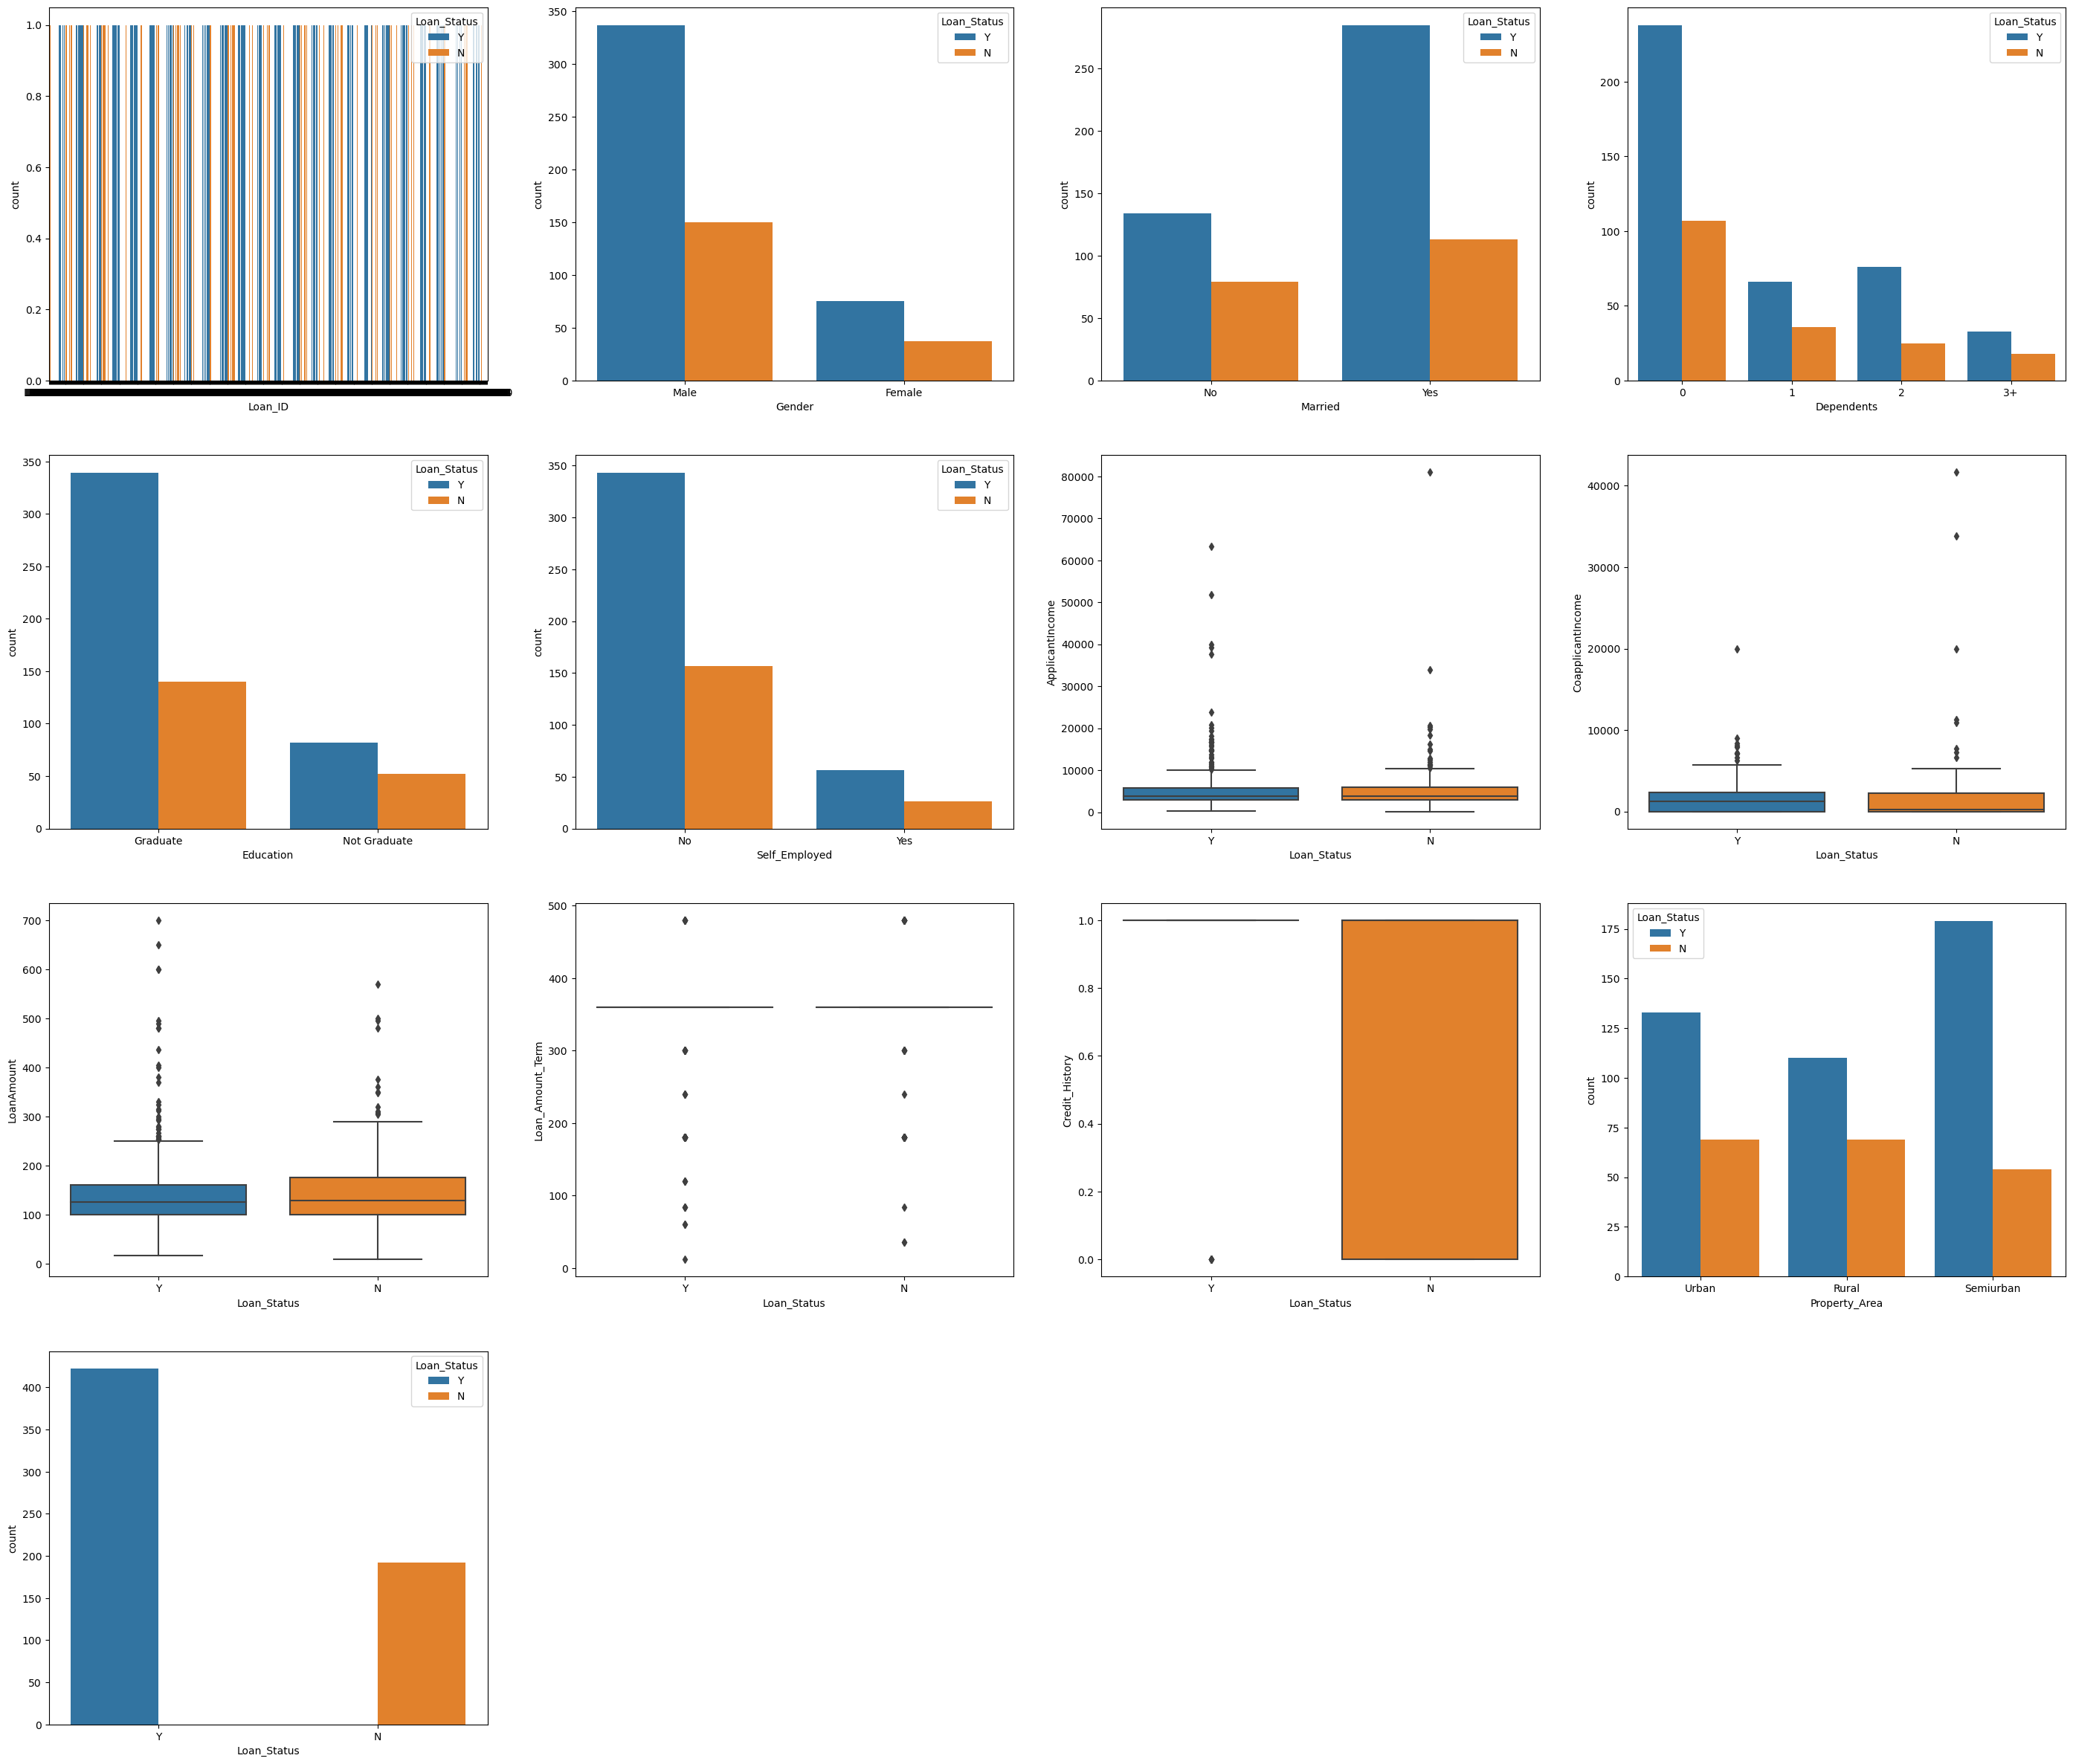

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb 

plt.figure(figsize = (35,30))
cat = []
con = []
x = 1
for i in train_dset.columns:
    if(train_dset[i].dtypes == "object"):
        cat.append(i)   
        plt.subplot(4,4,x)
        sb.countplot(x=i,hue='Loan_Status',data=train_dset)
        x = x + 1
    else:
        con.append(i)
        plt.subplot(4,4,x)
        sb.boxplot(train_dset.Loan_Status,train_dset[i])
        x = x + 1
        

# Missing Data Treatment

In [9]:
#from PM8wd import replacer
#replacer(train_dset)

In [10]:
train_dset.Gender.fillna(train_dset['Gender'].mode()[0] , inplace=True)
train_dset.Married.fillna(train_dset['Married'].mode()[0] ,inplace=True)
train_dset.Dependents.fillna(train_dset['Dependents'].mode()[0] , inplace=True)
train_dset.Education.fillna(train_dset['Education'].mode()[0] , inplace=True)
train_dset.Self_Employed.fillna(train_dset['Self_Employed'].mode()[0] , inplace=True)
train_dset.ApplicantIncome.fillna(train_dset['ApplicantIncome'].mean() , inplace=True)
train_dset.CoapplicantIncome.fillna(train_dset['CoapplicantIncome'].mean() , inplace=True)
train_dset.LoanAmount.fillna(train_dset['LoanAmount'].mean() , inplace=True)
train_dset.Loan_Amount_Term.fillna(train_dset['Loan_Amount_Term'].mean() , inplace=True)
train_dset.Credit_History.fillna(train_dset['Credit_History'].mean() , inplace=True)

In [11]:
train_dset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# For testing set

In [12]:
test_dset.Gender.fillna(train_dset['Gender'].mode()[0] , inplace=True)
test_dset.Married.fillna(train_dset['Married'].mode()[0] ,inplace=True)
test_dset.Dependents.fillna(train_dset['Dependents'].mode()[0] , inplace=True)
test_dset.Education.fillna(train_dset['Education'].mode()[0] , inplace=True)
test_dset.Self_Employed.fillna(train_dset['Self_Employed'].mode()[0] , inplace=True)
test_dset.ApplicantIncome.fillna(train_dset['ApplicantIncome'].mean() , inplace=True)
test_dset.CoapplicantIncome.fillna(train_dset['CoapplicantIncome'].mean() , inplace=True)
test_dset.LoanAmount.fillna(train_dset['LoanAmount'].mean() , inplace=True)
test_dset.Loan_Amount_Term.fillna(train_dset['Loan_Amount_Term'].mean() , inplace=True)
test_dset.Credit_History.fillna(train_dset['Credit_History'].mean() , inplace=True)

In [13]:
# test_dset.isna().sum()

# Define X and Y

In [14]:
Y = train_dset[["Loan_Status"]]
X = train_dset.drop(labels=["Loan_Status","Loan_ID"],axis=1)

In [15]:
cat = []
con = []

for i in X.columns:
    if(train_dset[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
X1 = X[con]
X2 =pd.get_dummies(X[cat])
Xnew = X1.join(X2)

# Divide Data in Training and Testing set

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.20,random_state=21)

# Training the Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",max_depth=1)
model = dtc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy = ",round(train_acc,4))
print("Testing Accuracy = ",round(test_acc,4))

Training Accuracy =  0.8065
Testing Accuracy =  0.8211


In [18]:
#list(zip(Xnew.columns,model.feature_importances_))

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",min_samples_leaf=2)
model = dtc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy = ",round(train_acc,4))
print("Testing Accuracy = ",round(test_acc,4))


Training Accuracy =  0.9552
Testing Accuracy =  0.7154


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",min_samples_split=5)
model = dtc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy = ",round(train_acc,4))
print("Testing Accuracy = ",round(test_acc,4))

Training Accuracy =  0.9674
Testing Accuracy =  0.7236


In [21]:
tg = {"min_samples_leaf": range(2,20),"max_depth": range(2,20)}

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_

{'max_depth': 2, 'min_samples_leaf': 2}

In [22]:
tg = {"min_samples_split": range(5,20)}

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_

{'min_samples_split': 14}

# MODEL 1 ---> MAX DEPTH =2

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",max_depth=2)
model = dtc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy (max_depth) ----> ",round(train_acc,4))
print("Testing Accuracy (max_depth) ----> ",round(test_acc,4))

Training Accuracy (max_depth) ---->  0.8065
Testing Accuracy (max_depth) ---->  0.8211


# MODEL 2 ---> MIN_SAMPLES_LEAF = 2

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",min_samples_leaf=2)
model = dtc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy (min_samples_leaf) ----> ",round(train_acc,4))
print("Testing Accuracy (min_samples_leaf) ----> ",round(test_acc,4))

Training Accuracy (min_samples_leaf) ---->  0.9552
Testing Accuracy (min_samples_leaf) ---->  0.7154


# MODEL 3 ---> MIN_SAMPLES_SPLIT 

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",min_samples_split=14)
model = dtc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy (min_samples_split) ----> ",round(train_acc,4))
print("Testing Accuracy (min_samples_split) ----> ",round(test_acc,4))

Training Accuracy (min_samples_split) ---->  0.9145
Testing Accuracy (min_samples_split) ---->  0.7236


# Random Forest

In [26]:
tg = {"max_depth": range(1,20),"min_samples_leaf": range(1,20)}

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_


{'max_depth': 14, 'min_samples_leaf': 4}

In [27]:
tg = {"min_samples_split": range(1,20) , "n_estimators": range(1,50)}

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_

{'min_samples_split': 11, 'n_estimators': 12}

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21,max_depth=14)
model = rfc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy on max_depth ----> ",round(train_acc,4))
print("Testing Accuracy on max_depth ----> ",round(test_acc,4))

Training Accuracy on max_depth ---->  0.9959
Testing Accuracy on max_depth ---->  0.7805


In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21,min_samples_leaf=4,n_estimators=12)
model = rfc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy  (min_samples_leaf)----> ",round(train_acc,4))
print("Testing Accuracy (min_samples_leaf)----> ",round(test_acc,4))

Training Accuracy  (min_samples_leaf)---->  0.8411
Testing Accuracy (min_samples_leaf)---->  0.7724


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21,min_samples_split=11,n_estimators=12)
model = rfc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy  (min_samples_split)----> ",round(train_acc,4))
print("Testing Accuracy (min_samples_split)----> ",round(test_acc,4))

Training Accuracy  (min_samples_split)---->  0.8819
Testing Accuracy (min_samples_split)---->  0.7724


# Adaboost 

In [31]:
from sklearn.ensemble import AdaBoostClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=5)
abc = AdaBoostClassifier(dtc,random_state=21)
model = abc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy  (max_depth)----> ",round(train_acc,4))
print("Testing Accuracy (max_depth)----> ",round(test_acc,4))

Training Accuracy  (max_depth)---->  1.0
Testing Accuracy (max_depth)---->  0.7073


In [36]:
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier(random_state=21,max_depth=5)
abc = AdaBoostClassifier(dtc,n_estimators=20)

model = abc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)

from sklearn.metrics import accuracy_score
print("training Accuracy: ",accuracy_score(ytrain,pred_tr))
print("testing Accuracy: ",accuracy_score(ytest,pred_ts))

for i in range(2,150,1):
    print("----------",i,"-----------")
    abc = AdaBoostClassifier(dtc,n_estimators=i)
    model = abc.fit(xtrain,ytrain)
    pred_ts = model.predict(xtest)
    pred_tr = model.predict(xtrain)
    from sklearn.metrics import accuracy_score
    print("training Accuracy: ",accuracy_score(ytrain,pred_tr))
    print("testing Accuracy: ",accuracy_score(ytest,pred_ts))

training Accuracy:  1.0
testing Accuracy:  0.7154471544715447
---------- 2 -----------
training Accuracy:  0.8757637474541752
testing Accuracy:  0.7723577235772358
---------- 3 -----------
training Accuracy:  0.9164969450101833
testing Accuracy:  0.7723577235772358
---------- 4 -----------
training Accuracy:  0.955193482688391
testing Accuracy:  0.7886178861788617
---------- 5 -----------
training Accuracy:  0.9714867617107943
testing Accuracy:  0.7398373983739838
---------- 6 -----------
training Accuracy:  0.9755600814663951
testing Accuracy:  0.7235772357723578
---------- 7 -----------
training Accuracy:  0.9877800407331976
testing Accuracy:  0.7723577235772358
---------- 8 -----------
training Accuracy:  0.9938900203665988
testing Accuracy:  0.7560975609756098
---------- 9 -----------
training Accuracy:  1.0
testing Accuracy:  0.7723577235772358
---------- 10 -----------
training Accuracy:  1.0
testing Accuracy:  0.7642276422764228
---------- 11 -----------
training Accuracy:  1.0


In [40]:
from sklearn.ensemble import AdaBoostClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=5)
abc = AdaBoostClassifier(dtc,random_state=21,n_estimators=131)
model = abc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(ytrain,pred_loan_tr)
test_acc = accuracy_score(ytest,pred_loan_ts)

print("Training Accuracy  (max_depth)----> ",round(train_acc,4))
print("Testing Accuracy (max_depth)----> ",round(test_acc,4))

Training Accuracy  (max_depth)---->  1.0
Testing Accuracy (max_depth)---->  0.748


In [41]:
test_dset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
test_dset.shape

(367, 12)

In [43]:
cat = []
con = []

for i in test_dset.columns:
    if(test_dset[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

X1 = pd.get_dummies(test_dset[cat])
X2 = test_dset[con]

X_new_test = X1.join(X2)

In [44]:
X_new_test[Xnew.columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.842199,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.842199,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [45]:
X_final = X_new_test[Xnew.columns]

In [46]:
pred_final = model.predict(X_final)

In [47]:
test_dset["Loan_Status"] = pred_final

In [48]:
final = test_dset['Loan_Status']

In [49]:
final.to_csv("Loan_Status_prediction.csv",index=None)

# .If customer is not eligible for the input required amount and duration:

a.)what can be amount for the given duration.(Regression)

b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [50]:
cust_not_eli = train_dset[train_dset.Loan_Status == "N"]

In [51]:
Y = cust_not_eli[["LoanAmount"]]
X = cust_not_eli.drop(labels=["LoanAmount","Loan_ID"],axis=1)

In [52]:
cat = []
con = []

for i in X.columns:
    if(train_dset[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
X1 = X[con]
X2 =pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [53]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N
1,5405.54085,1508.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1
7,3036.00000,2504.0,360.0,0.000000,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1
9,12841.00000,10968.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1
13,1853.00000,2840.0,360.0,1.000000,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1
17,3510.00000,0.0,360.0,0.000000,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,6383.00000,1000.0,360.0,1.000000,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1
597,2987.00000,0.0,360.0,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1
600,416.00000,41667.0,180.0,0.842199,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1
605,2400.00000,3800.0,180.0,1.000000,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,1


In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
model = dtr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  41.19
Testing Error:  40.7


In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=2)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_tr)
mae_ts = mean_absolute_error(ytest,pred_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))


Training Error:  17.87
Testing Error:  53.07


In [57]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=9)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_tr)
mae_ts = mean_absolute_error(ytest,pred_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))


Training Error:  36.1
Testing Error:  43.31


In [62]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=12)
model_final = dtr.fit(xtrain,ytrain)

pred_tr = model_final.predict(xtrain)
pred_ts = model_final.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_tr)
mae_ts = mean_absolute_error(ytest,pred_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))


Training Error:  38.82
Testing Error:  38.57


In [63]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_split=3)
model = dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_tr)
mae_ts = mean_absolute_error(ytest,pred_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  5.29
Testing Error:  58.43


In [64]:
from sklearn.model_selection import GridSearchCV

tg = {"max_depth":range(1,20),"min_samples_leaf":range(5,20)}
dtr = DecisionTreeRegressor(random_state=21)

cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 3, 'min_samples_leaf': 5}

In [65]:
tg = {"min_samples_split": range(3,20)}

dtr = DecisionTreeRegressor(random_state = 21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_


{'min_samples_split': 8}

# Model 1

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=3)
model = dtr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  33.63
Testing Error:  43.41


# Model 2

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=5)
model = dtr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  31.07
Testing Error:  43.66


# Model 3

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_split=8)
model = dtr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  23.75
Testing Error:  58.69


# Random Forest Regression

In [69]:
tg = {"max_depth": range(1,20),"min_samples_leaf": range(1,20)}

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tg,scoring="accuracy",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_

{'max_depth': 1, 'min_samples_leaf': 1}

In [70]:
tg = {"min_samples_split": range(2,20) , "n_estimators": range(1,50)}

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 21)

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,tg,scoring="accuracy",cv=4)

cv_model = cv.fit(xtrain,ytrain)
cv_model.best_params_

{'min_samples_split': 2, 'n_estimators': 1}

# Model 1

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,max_depth=1)
model = rfr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  46.46
Testing Error:  36.73


# Model 2

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,min_samples_leaf=1,n_estimators=20)
model = rfr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  17.39
Testing Error:  39.1


# Model 3

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,min_samples_split=2,n_estimators=1)
model = rfr.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  21.46
Testing Error:  53.04


# Adaboost 

In [75]:
from sklearn.ensemble import AdaBoostRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=3)
abc = AdaBoostRegressor(dtr,random_state=21)
model = abc.fit(xtrain,ytrain)

pred_loan_tr = model.predict(xtrain)
pred_loan_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
mae_tr = mean_absolute_error(ytrain,pred_loan_tr)
mae_ts = mean_absolute_error(ytest,pred_loan_ts)

print("Training Error: ",round(mae_tr,2))
print("Testing Error: ",round(mae_ts,2))

Training Error:  30.43
Testing Error:  33.41


In [76]:
test_dset.shape

(367, 13)

In [77]:
cat = []
con = []

for i in test_dset.columns:
    if(test_dset[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

X1 = pd.get_dummies(test_dset[cat])
X2 = test_dset[con]

X_new_test = X1.join(X2)

In [78]:
X_new_test[Xnew.columns]

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N
0,5720,0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0
1,3076,1500,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0
2,5000,1800,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0
3,2340,2546,360.0,0.842199,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0
4,3276,0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
363,4158,709,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0
364,3250,1993,360.0,0.842199,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0
365,5000,2393,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1


In [79]:
X_final = X_new_test[Xnew.columns]

In [81]:
pred_final = model_final.predict(X_final)

In [82]:
test_dset["LoanAmount"] = pred_final

In [83]:
final = test_dset['LoanAmount']

In [84]:
final.to_csv("Loan_Amount_prediction_final.csv",index=None)